This notebook reads a previously computed POD. It is assumed that the POD save file was computed by the `run_pod.py` script which reads in the `pod_config.yaml` configuration file.

---

### 1. Read POD from save file

In [15]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os
import sys
import h5py

sys.path.append("../../")
from pod_class import POD

pod_path = "pod/RBC_A4Ra1e6Pr10_fs_pod.hdf5"
pod = POD(savefile=pod_path)  #note that the POD object can be instantiated from both the save file and the pod_config.yaml

nmodes = 20  # no. modes we consider for this example

### 2. Load the computed POD time coefficients $a_k(t)$ and spatial modes $\phi_k(x,y)$, as well as the pod spectrum.

In [20]:
time_coefficients = pod.get_time_coefficients(nmodes=nmodes)
spatial_modes = pod.get_spatial_modes(nmodes=nmodes)
evals = pod.get_eigen_values()

### 3. Analyse results


#### 3.1 POD spectrum

Text(0, 0.5, 'Individual contribution to variance [%]')

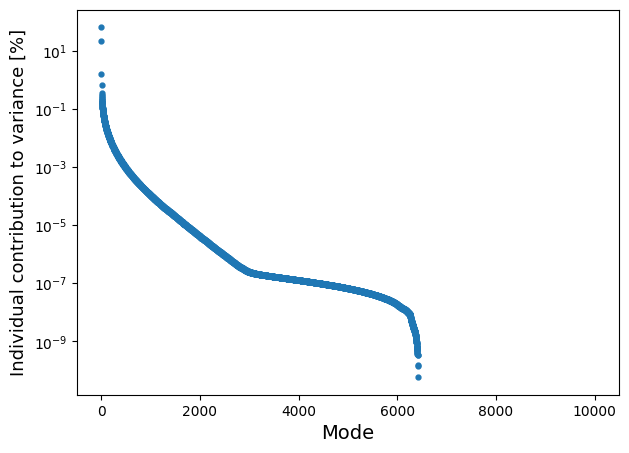

In [21]:
# Compute the POD spectrum
#--------------------------------------
pod_spectrum = evals/evals.sum()

# Plot spectrum
#--------------
fig,axs = plt.subplots(figsize=(7,5))
axs.semilogy(range(1,len(pod_spectrum)+1),pod_spectrum*100,marker=".",markersize=7,linewidth=0)
axs.set_xlabel("Mode",fontsize=14)
axs.set_ylabel("Individual contribution to variance [%]",fontsize=13)

#### 3.2 Time coefficients $a_k(t)$

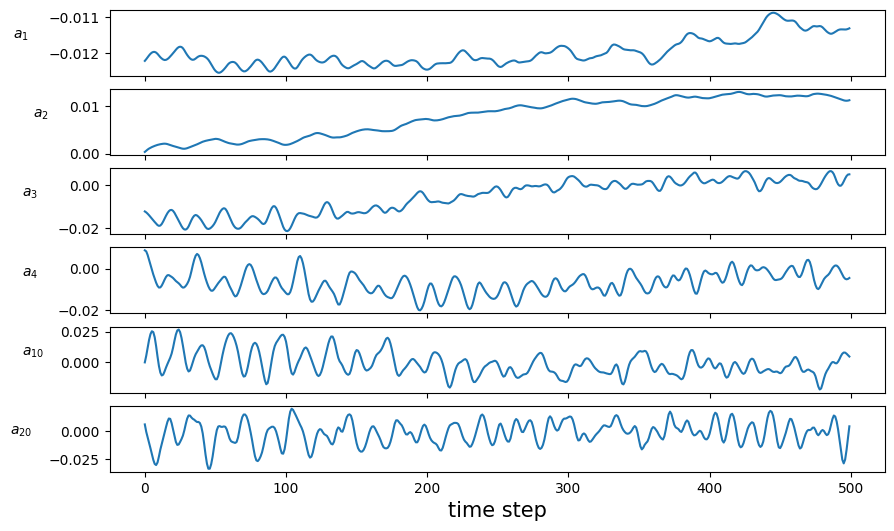

In [25]:
# Plot time coefficents 
#-------------------------
modes = [0,1,2,3,9,19]
fig,axs = plt.subplots(figsize=(10,len(modes)),nrows=len(modes),sharex=True)

for ii,imode in enumerate(modes):
    axs[ii].plot(time_coefficients[:500,imode])
    axs[ii].set_ylabel(r"$a_{"+f"{imode+1}"+r"}$",rotation=0,labelpad=20)
    
axs[-1].set_xlabel("time step",fontsize=15)
for iax in axs:
    pass
    #iax.set_ylim([-0.05,0.05])

#### 3.3. Spatial modes $\phi_k(t)$

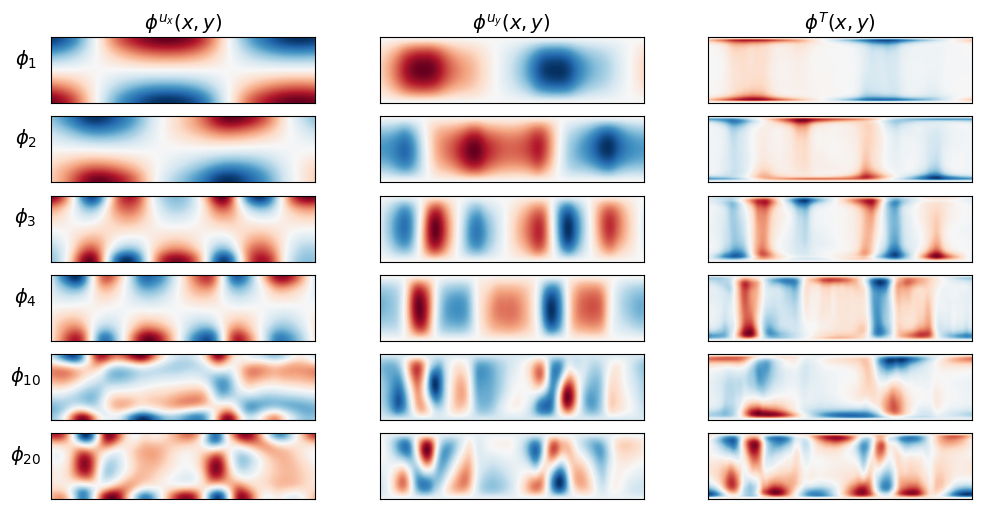

In [30]:
spatial_modes = spatial_modes.reshape(3,pod.ny,pod.nx,-1) 

fig,axs = plt.subplots(figsize=(4*3,len(modes)),ncols=3,nrows=len(modes))
for jj,ifield in enumerate(range(3)):
    for ii,imode in enumerate(modes):
        axs[ii,jj].imshow(spatial_modes[ifield,:,:,imode].flip(0),cmap="RdBu_r",interpolation="gaussian")
        axs[ii,0].set_ylabel(r"$\phi_{"+f"{imode+1}"+r"}$",fontsize=14,rotation=0,labelpad=15)
        
for iax in axs.flatten():
    iax.set_xticks([])
    iax.set_yticks([])
    
axs[0,0].set_title(r"$\phi^{u_x}(x,y)$",fontsize=14)
axs[0,1].set_title(r"$\phi^{u_y}(x,y)$",fontsize=14)
axs[0,2].set_title(r"$\phi^{T}(x,y)$",fontsize=14);